# Import python library

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress warnings 

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Sklearn pre-processing

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.decomposition import FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

In [4]:
seed = 10

# Training data

In [5]:
app_train = pd.read_csv('dataset/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Testing data features

In [6]:
app_test = pd.read_csv('dataset/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

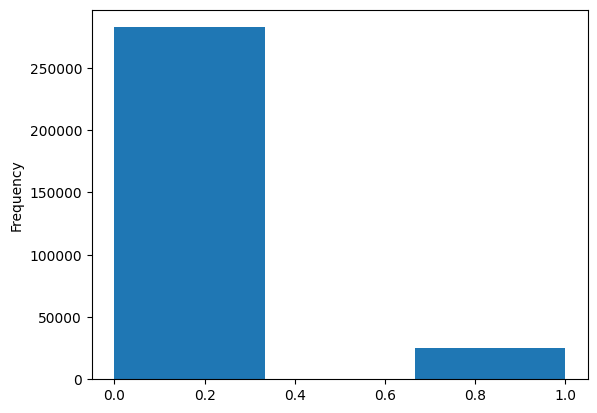

In [8]:
app_train['TARGET'].astype(int).plot.hist(bins=3);

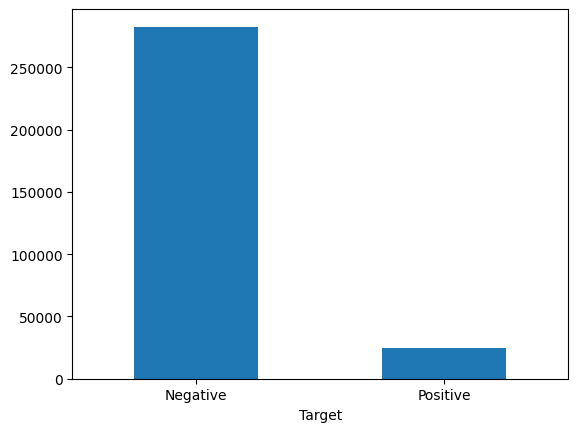

In [9]:
plot_df = pd.DataFrame({'Target':["Negative", "Positive"], 'Value':[282686, 24825]})
ax = plot_df.plot.bar(x='Target', y='Value', rot=0, legend=False)

# Function to calculate missing values by column

In [10]:
def missing_values_table(df):
    
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

# Missing values statistics

In [11]:
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


# Number of each type of column

In [12]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

# Number of unique classes in each object column

In [13]:
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

# Create a label encoder object

In [14]:
le = LabelEncoder()
le_count = 0

# Iterate through the columns

In [15]:
for col in app_train:
    if app_train[col].dtype == 'object':
        
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            
            # Train on the training data
            le.fit(app_train[col])
            
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1

In [16]:
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


# one-hot encoding of categorical variables

In [17]:
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

In [18]:
print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [19]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes

In [20]:
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in

In [21]:
app_train['TARGET'] = train_labels

In [22]:
print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


In [23]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

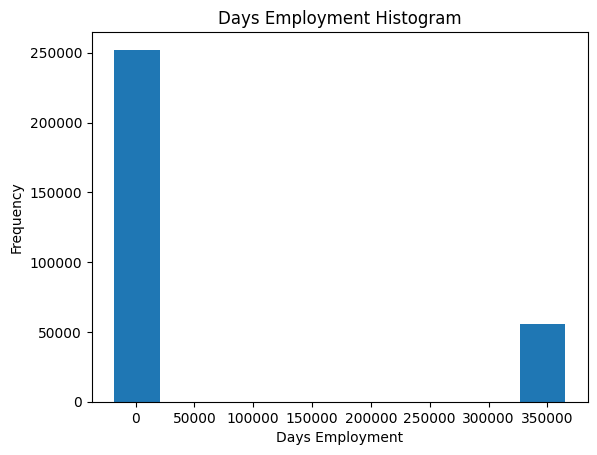

In [24]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [25]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


# Create an anomalous flag column

In [26]:
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan

In [27]:
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

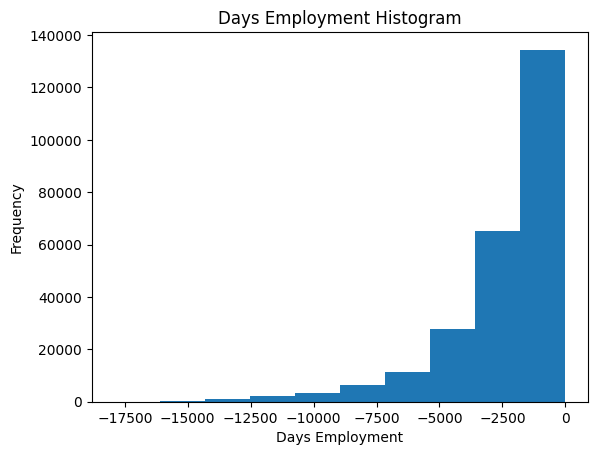

In [28]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [29]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

In [30]:
print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


# Drop the target from the training data

In [31]:
trainY = app_train['TARGET']

In [32]:
if 'TARGET' in app_train:
    trainX = app_train.drop(columns = ['TARGET'])
else:
    trainX = app_train.copy()

# Feature names

In [33]:
features = list(trainX.columns)

# Copy of the testing data

In [34]:
test = app_test.copy()

# Median imputation of missing values

In [35]:
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1

In [36]:
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data

In [37]:
imputer.fit(trainX)

SimpleImputer(strategy='median')

# Transform both training and testing data

In [38]:
trainX = imputer.transform(trainX)
test = imputer.transform(app_test)

In [39]:
new_app_train = pd.DataFrame(data=trainX[:,:], columns=features[:])
new_app_train['TARGET'] = trainY

In [40]:
new_app_test = pd.DataFrame(data=test[:,:], columns=features[:])

In [41]:
print(trainX.shape)
print(trainY.shape)
print(new_app_train.shape)
print(type(new_app_train))
missing_values = missing_values_table(new_app_train)

(307511, 240)
(307511,)
(307511, 241)
<class 'pandas.core.frame.DataFrame'>
Your selected dataframe has 241 columns.
There are 0 columns that have missing values.


In [42]:
X_train, X_test, y_train, y_test = train_test_split(trainX, trainY, test_size=0.33, random_state=seed)

In [43]:
missing_values = missing_values_table(pd.DataFrame(trainX))

Your selected dataframe has 240 columns.
There are 0 columns that have missing values.


In [44]:
missing_values.head()

,Missing Values,% of Total Values


In [45]:
scalar = preprocessing.StandardScaler().fit(X_train)
X_train_norm = pd.DataFrame(scalar.transform(X_train))
y_train_norm = y_train.reset_index(drop=True)

In [46]:
y_train = y_train_norm
X_train = X_train_norm

In [47]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_train_norm))
print(transformed.head())

          0         1
0 -1.701894  0.938909
1 -1.210138  0.597915
2  6.909935  1.334381
3 -1.470664  1.939380
4  3.478351  1.281296


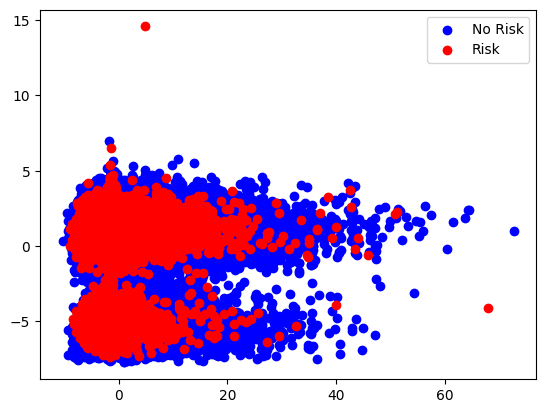

In [48]:
plt.scatter(transformed[y_train_norm==0][0], transformed[y_train_norm==0][1], label='No Risk', c='blue')
plt.scatter(transformed[y_train_norm==1][0], transformed[y_train_norm==1][1], label='Risk', c='red')
plt.legend()
plt.show()

In [49]:
from sklearn.decomposition import FastICA
pca = FastICA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_train_norm))

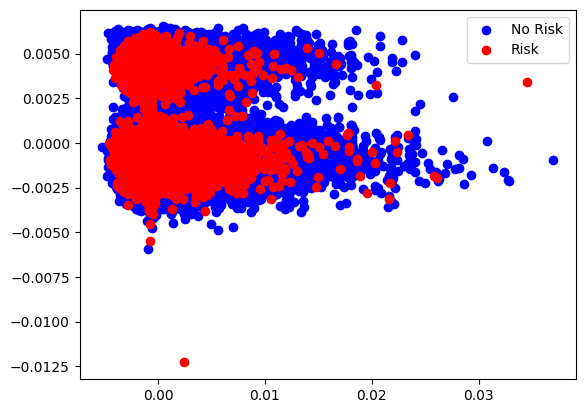

In [50]:
plt.scatter(transformed[y_train_norm==0][0], transformed[y_train_norm==0][1], label='No Risk', c='blue')
plt.scatter(transformed[y_train_norm==1][0], transformed[y_train_norm==1][1], label='Risk', c='red')
plt.legend()
plt.show()